# Making buy can sell indicator 
Using a simple strategy called Simple Moving Average Crossover 

### Step 1: Import Packages and Libraries 

In [2]:
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Step 2: Get the Stock Data

In [ ]:
# we will use  Reliance 
data = yf.download('Reliance.NS', start='2022-01-01', end='2025-11-01')
data.head()

C:\Users\subhy\AppData\Local\Temp\ipykernel_9400\2172372684.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('Reliance.NS', start='2022-01-01', end='2025-11-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2022-01-03,1093.780518,1095.646128,1075.443589,1076.103370,5421611
2022-01-04,1118.465088,1119.784652,1093.848914,1099.263652,10847728
2022-01-05,1123.697754,1127.064905,1107.021590,1120.239736,11643813
2022-01-06,1099.536499,1116.599479,1096.123855,1115.325409,14447422
2022-01-07,1108.409302,1118.442271,1097.284238,1106.111499,13112115


### Step 3: Calculate Moving Averages

In [4]:
# Short-term and long-term moving average
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['SMA50'] = data['Close'].rolling(window=50).mean()

### Step 4: Create Buy/Sell Signals

In [5]:
# Intialize Singal Column
data['Signal'] = 0

# Properly assign signals using iloc
signal_values = np.where(data['SMA20'][20:] > data['SMA50'][20:], 1, 0)
data.iloc[20:, data.columns.get_loc('Signal')] = signal_values

# Now safely crate Positin column based on Signal Changes
data['Position'] = data['Signal'].diff()


### Step 5: Plot the Strategy

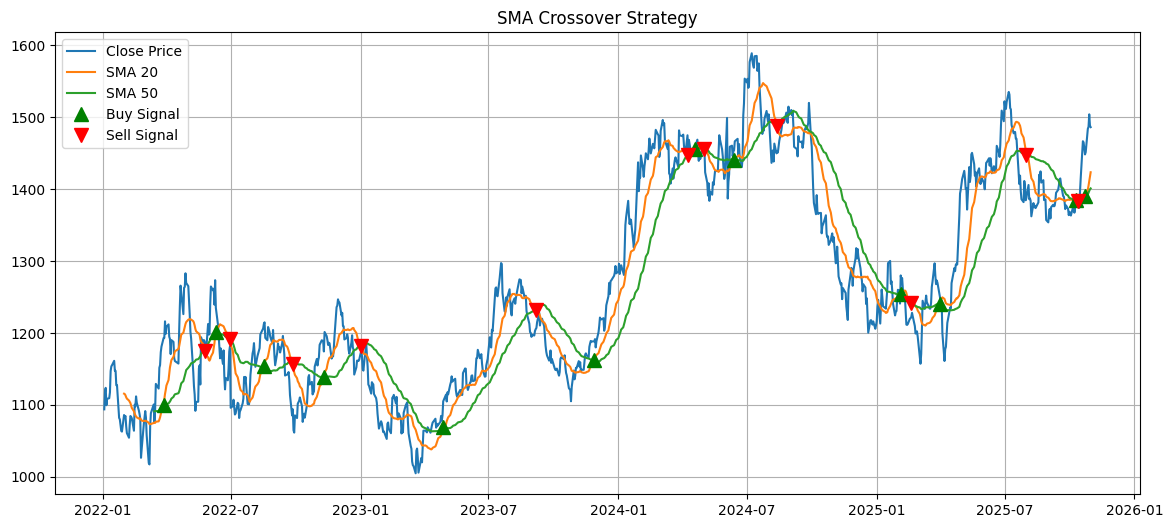

In [6]:
plt.figure(figsize=(14,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA20'], label='SMA 20')
plt.plot(data['SMA50'], label='SMA 50')
plt.plot(data[data['Position'] == 1].index,
         data['SMA20'][data['Position'] == 1],
         '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['Position'] == -1].index,
         data['SMA20'][data['Position'] == -1], 
         'v', markersize=10, color='r', label='Sell Signal')
plt.title('SMA Crossover Strategy')
plt.legend()
plt.grid()
plt.show()       
